In [1]:
import hddm
import os
import sys
import copy
import seaborn as sns
import pandas as pd
import glob
import matplotlib.pyplot as plt
from kabuki.analyze import gelman_rubin
from kabuki.analyze import check_geweke
import kabuki
print (os.environ['CONDA_DEFAULT_ENV'])
%matplotlib inline

hddm92


In [2]:
#sys.path
hddm.__version__ 

'0.9.5'

In [4]:
nchains = 5
chains = []
for i in range(nchains):
    chain = hddm.load('./models/reward_block_a_v_t_thin_center_chain_' + str(i))
    chains.append(chain)
    print(i)

0
1
2
3
4


In [5]:
a = gelman_rubin(chains)
# print(a)

In [6]:
max(a.values())

1.0296735147201468

In [7]:
combined_model = kabuki.utils.concat_models(chains)


Plotting v_Intercept
Plotting v_Intercept_std
Plotting v_C(miniblock_type, Treatment("noncompete"))[T.compete]
Plotting v_C(miniblock_type, Treatment("noncompete"))[T.rewarded]
Plotting v_coherence_center
Plotting a_Intercept
Plotting a_Intercept_std
Plotting a_C(miniblock_type, Treatment("noncompete"))[T.compete]
Plotting a_C(miniblock_type, Treatment("noncompete"))[T.rewarded]
Plotting t_Intercept
Plotting t_Intercept_std
Plotting t_C(miniblock_type, Treatment("noncompete"))[T.compete]
Plotting t_C(miniblock_type, Treatment("noncompete"))[T.rewarded]


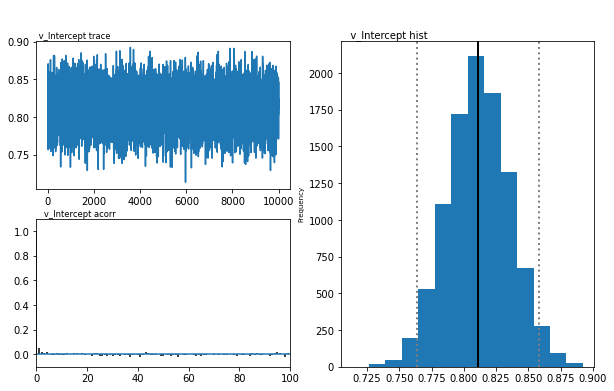

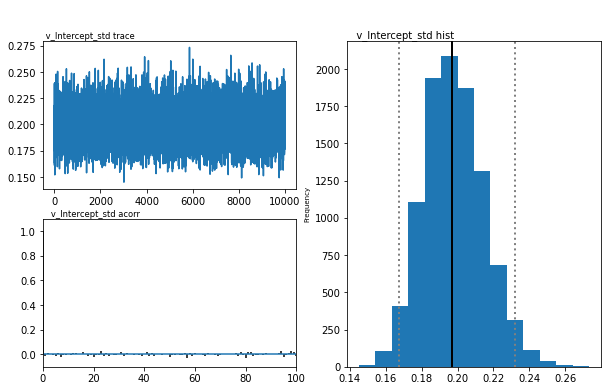

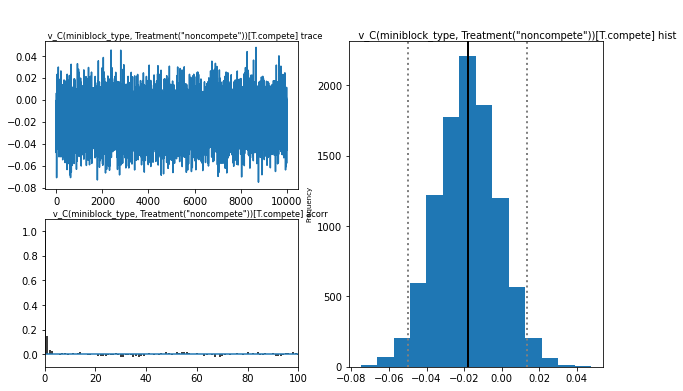

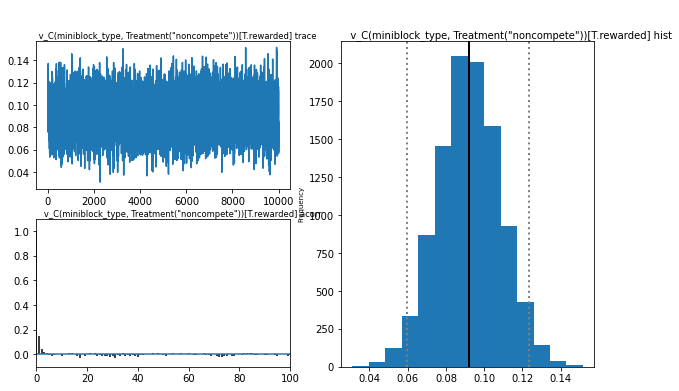

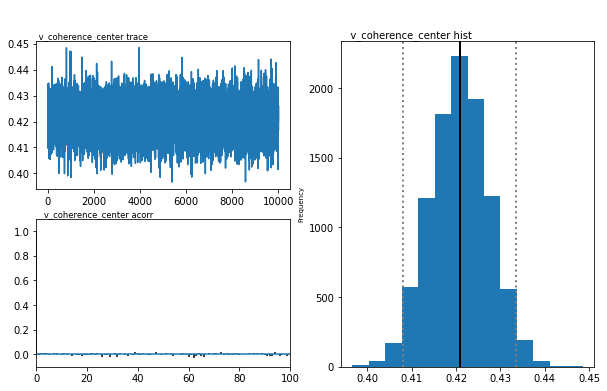

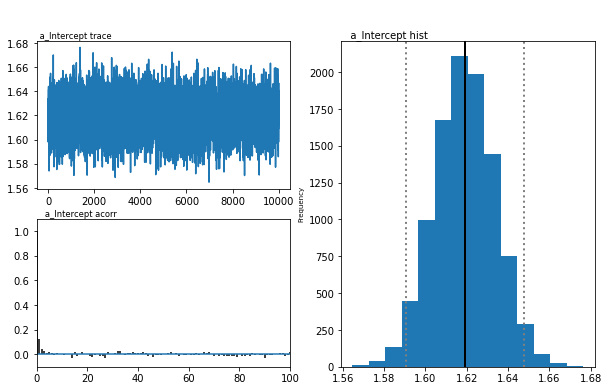

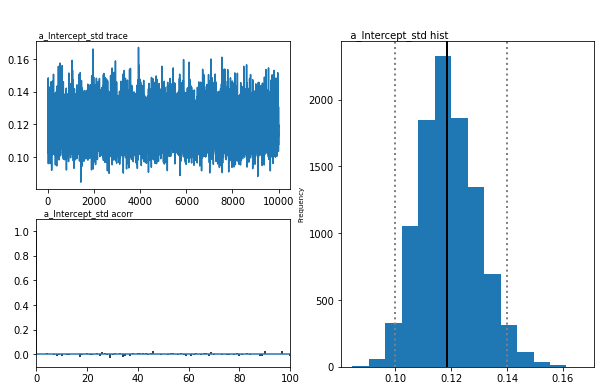

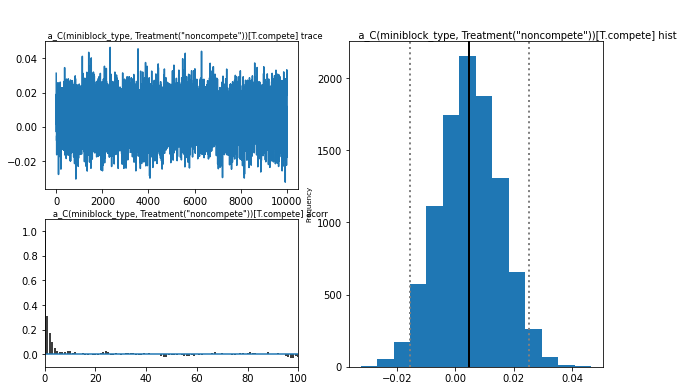

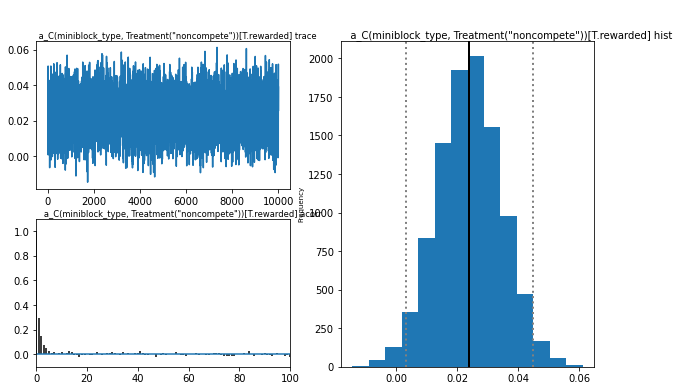

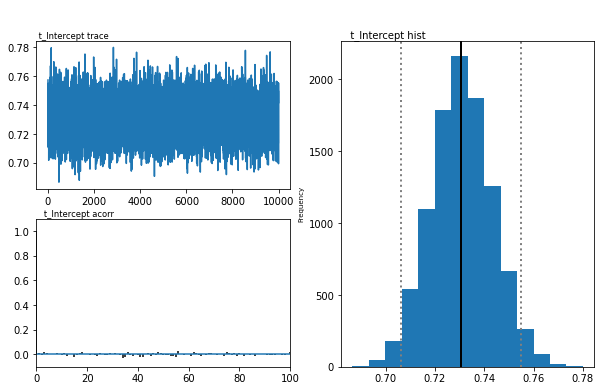

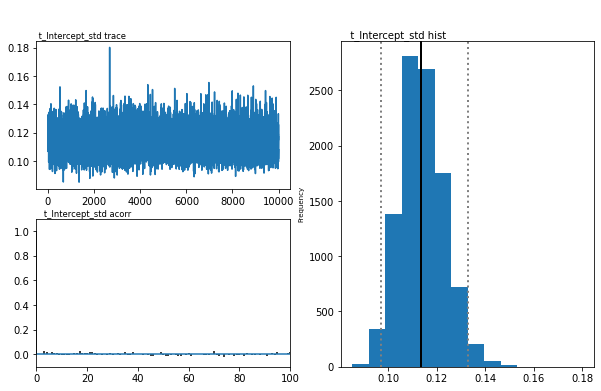

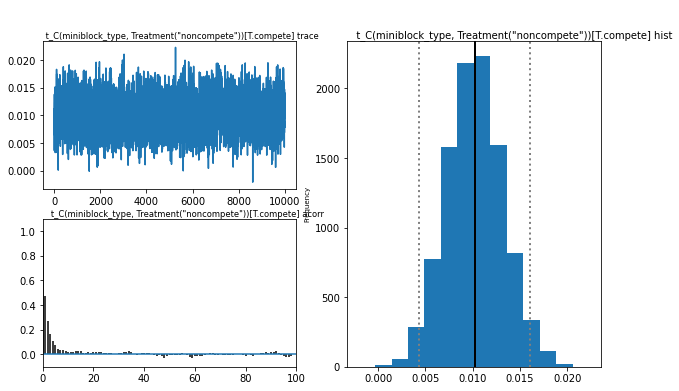

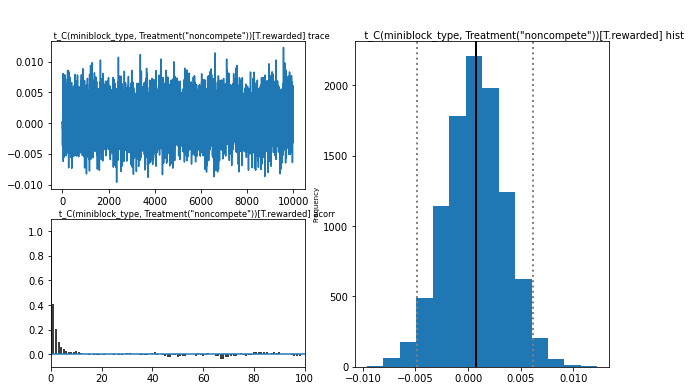

In [8]:
combined_model.plot_posteriors()

In [9]:
stats = combined_model.print_stats()

                                                                 mean         std        2.5q         25q          50q         75q       97.5q       mc err
v_Intercept                                                  0.811372   0.0241455    0.763988    0.795007       0.8112    0.827654    0.858735   0.00023473
v_Intercept_std                                              0.198023    0.016774    0.167842    0.186237     0.197036    0.209029    0.233179   0.00017083
v_Intercept_subj.0                                           0.868142   0.0643285    0.745501    0.824852     0.868272    0.911222    0.996401  0.000625109
v_Intercept_subj.1                                           0.819013   0.0584137    0.705001    0.780026     0.818939     0.85743    0.933266  0.000555968
v_Intercept_subj.2                                           0.841864   0.0633818    0.717245    0.798939     0.841823    0.884282    0.964811  0.000660606
v_Intercept_subj.3                                           0.4

In [9]:
check_geweke(combined_model, assert_=False)

Chain of knode_name          v_Intercept
stochastic                 True
observed                  False
subj                      False
node                v_Intercept
tag                          ()
depends                      []
hidden                    False
index                       NaN
sub                         NaN
miniblock                   NaN
rt                          NaN
rule                        NaN
miniblock_type              NaN
response                    NaN
cond                        NaN
coherence                   NaN
rewarded_rule               NaN
coherence_bin               NaN
subj_idx                    NaN
coherence_float             NaN
rt_flip                     NaN
coherence_center            NaN
mean                   0.811372
std                   0.0241455
2.5q                   0.763988
25q                    0.795007
50q                      0.8112
75q                    0.827654
97.5q                  0.858735
mc err               0.00023473

False

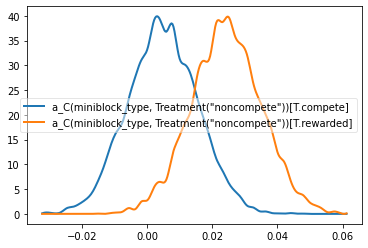

In [10]:
intercept, a_compete, a_rewarded = combined_model.nodes_db.node.loc[['a_Intercept', 
                                                                           'a_C(miniblock_type, Treatment("noncompete"))[T.compete]',
                                                                           'a_C(miniblock_type, Treatment("noncompete"))[T.rewarded]']]

hddm.analyze.plot_posterior_nodes([a_compete, a_rewarded])

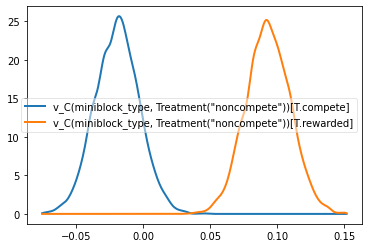

In [11]:
intercept, v_compete, v_rewarded = combined_model.nodes_db.node.loc[['v_Intercept', 
                                                                       'v_C(miniblock_type, Treatment("noncompete"))[T.compete]',
                                                                           'v_C(miniblock_type, Treatment("noncompete"))[T.rewarded]']]

hddm.analyze.plot_posterior_nodes([v_compete, v_rewarded])

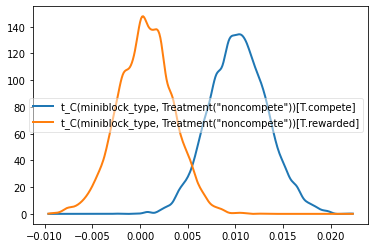

In [12]:
intercept, t_compete, t_rewarded = combined_model.nodes_db.node.loc[['t_Intercept', 
                                                                       't_C(miniblock_type, Treatment("noncompete"))[T.compete]',
                                                                           't_C(miniblock_type, Treatment("noncompete"))[T.rewarded]']]

hddm.analyze.plot_posterior_nodes([t_compete, t_rewarded])

In [13]:
combined_model.dic

79394.9055810443

In [14]:
df = pd.DataFrame({'v_rewarded':v_rewarded.trace(),
                  'v_compete' : v_compete.trace(),
                  'a_rewarded' : a_rewarded.trace(),
                  'a_compete' : a_compete.trace(),
                  't_rewarded' : t_rewarded.trace(),
                  't_compete' : t_compete.trace()})
df.to_csv('/home/despo/rule_habit/simulated_data/traces_reward.csv',
         index = False)

In [15]:
print("v_rewarded = ", (v_rewarded.trace() > 0).mean())
print("v_rewarded versus compete = ", (v_rewarded.trace() > v_compete.trace()).mean())
print("v_compete = ", (v_compete.trace() < 0).mean())
print('\n')


print("a_rewarded = ", (a_rewarded.trace() > 0).mean())
print("a_rewarded versus compete = ", (a_rewarded.trace() > a_compete.trace()).mean())


print("a_compete = ", (a_compete.trace() > 0).mean())
print('\n')


print("t_rewarded = ", (t_rewarded.trace() > 0).mean())
print("t_rewarded versus compete = ", (t_rewarded.trace() < t_compete.trace()).mean())
print("t_compete = ", (t_compete.trace() > 0).mean())

v_rewarded =  1.0
v_rewarded versus compete =  1.0
v_compete =  0.8716


a_rewarded =  0.9883
a_rewarded versus compete =  0.9587
a_compete =  0.6798


t_rewarded =  0.6051
t_rewarded versus compete =  0.9987
t_compete =  0.9997


In [16]:
print("v_rewarded = ", (v_rewarded.trace() > 0).mean())
print("v_rewarded versus compete = ", (v_rewarded.trace() > v_compete.trace()).mean())
print("v_compete = ", (v_compete.trace() < 0).mean())
print('\n')


print("a_rewarded = ", (a_rewarded.trace() > 0).mean())
print("a_rewarded versus compete = ", (a_rewarded.trace() > a_compete.trace()).mean())


print("a_compete = ", (a_compete.trace() > 0).mean())
print('\n')


print("t_rewarded = ", (t_rewarded.trace() > 0).mean())
print("t_rewarded versus compete = ", (t_rewarded.trace() < t_compete.trace()).mean())
print("t_compete = ", (t_compete.trace() > 0).mean())

v_rewarded =  1.0
v_rewarded versus compete =  1.0
v_compete =  0.8716


a_rewarded =  0.9883
a_rewarded versus compete =  0.9587
a_compete =  0.6798


t_rewarded =  0.6051
t_rewarded versus compete =  0.9987
t_compete =  0.9997


In [9]:
a = combined_model.gen_stats()
a

,mean,std,2.5q,25q,50q,75q,97.5q,mc err
v_Intercept,0.811372,0.0241455,0.763988,0.795007,0.8112,0.827654,0.858735,0.00023473
v_Intercept_std,0.198023,0.016774,0.167842,0.186237,0.197036,0.209029,0.233179,0.00017083
v_Intercept_subj.0,0.868142,0.0643285,0.745501,0.824852,0.868272,0.911222,0.996401,0.000625109
v_Intercept_subj.1,0.819013,0.0584137,0.705001,0.780026,0.818939,0.85743,0.933266,0.000555968
v_Intercept_subj.2,0.841864,0.0633818,0.717245,0.798939,0.841823,0.884282,0.964811,0.000660606
...,...,...,...,...,...,...,...,...
t_Intercept_subj.83,0.736178,0.0145755,0.710452,0.725471,0.735782,0.745654,0.767079,0.000145624
t_Intercept_subj.84,0.580621,0.00677131,0.566525,0.57634,0.580914,0.585332,0.592974,7.3473e-05
t_Intercept_subj.85,0.787433,0.0108629,0.764664,0.780845,0.787851,0.794337,0.807552,9.81198e-05
"t_C(miniblock_type, Treatment(""noncompete""))[T.compete]",0.0102455,0.00298289,0.00447064,0.0082043,0.0102065,0.0122132,0.016287,5.95285e-05


In [9]:
res = hddm.utils.post_pred_gen(combined_model, groupby = ['subj_idx'], append_data = True, samples = 1)

 [-----------------100%-----------------] 86 of 86 complete in 5.8 sec

In [28]:
data = hddm.load_csv('/home/despo/rule_habit/hddm_data_full.csv')
data = data[data.cond == 'reward']

comparison = hddm.utils.post_pred_stats(data, res)

In [29]:
comparison

,observed,mean,std,SEM,MSE,credible,quantile,mahalanobis
stat,,,,,,,,
accuracy,0.753111,0.773374,0.056453,0.000411,0.003598,True,31.065117,0.358942
mean_ub,1.239049,1.313999,0.125450,0.005617,0.021355,True,31.004652,0.597449
std_ub,0.286297,0.463549,0.068114,0.031418,0.036058,False,0.395349,2.602284
10q_ub,0.876813,0.899112,0.109804,0.000497,0.012554,True,44.283722,0.203087
30q_ub,1.060805,1.024603,0.112150,0.001311,0.013888,True,62.495350,0.322806
50q_ub,1.222390,1.176540,0.118148,0.002102,0.016061,True,62.746513,0.388072
70q_ub,1.390089,1.405677,0.132917,0.000243,0.017910,True,45.153488,0.117277
90q_ub,1.634618,1.906072,0.184509,0.073687,0.107731,True,7.069767,1.471222
mean_lb,-1.345858,-1.360175,0.137792,0.000205,0.019192,True,54.448837,0.103905


In [14]:
# flip error reaction times to be positive again
res['accuracy_sampled'] = [int(x) for x in res['rt_sampled'] > 0]
res['rt_positive_sampled'] = [rt*(int(rt>0)*2-1) for rt, r in list(zip(res['rt_sampled'], res['response']))]
res['rt_positive'] = [rt*(int(rt>0)*2-1) for rt, r in list(zip(res['rt'], res['response']))]


In [ ]:
fig_df = res.reset_index().groupby(['sub', 'coherence_bin', 'miniblock_type','cond','level_2']).mean().reset_index()

In [20]:
fig_df.to_csv('/home/despo/rule_habit/simulated_data/avt_reward.csv')

In [33]:
fig_df.groupby('response').mean()

,coherence_bin,level_2,sample,rt_sampled,response_sampled,level_0,index,rt,coherence,subj_idx,coherence_float,rt_flip,coherence_center,accuracy_sampled,rt_positive_sampled,rt_positive
response,,,,,,,,,,,,,,,,
0.0,1.019005,280.285903,249.5,0.567766,0.714166,32514.297637,32514.297637,-1.345858,0.390003,42.728475,1.019005,-1.345858,-0.432749,0.714166,1.352981,1.345858
1.0,1.661393,285.915592,249.5,0.754727,0.792948,32307.130756,32307.130756,1.239049,0.421324,42.451349,1.661393,1.239049,0.141823,0.792948,1.313287,1.239049


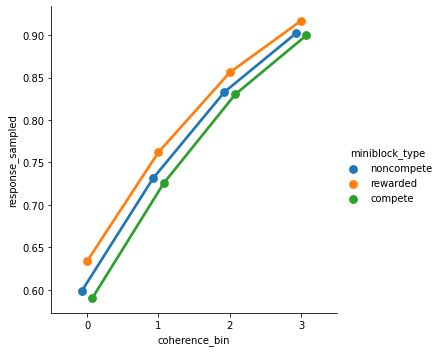

In [41]:
sns.catplot(data=fig_df,
        x="coherence_bin",
        y="response_sampled",
        hue = "miniblock_type",
        kind = "point",
                hue_order = ['noncompete','rewarded','compete'],
        dodge = .15,
        ci = 68)

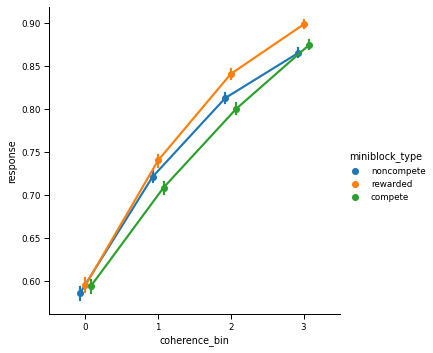

In [53]:
sns.set_context('paper')
sns.catplot(
        x="coherence_bin",
           y="response",
           hue = "miniblock_type",
            kind = 'point',
    hue_order = ['noncompete','rewarded','compete'],
            dodge = .15,
    ci = 68,
           data=fig_df)

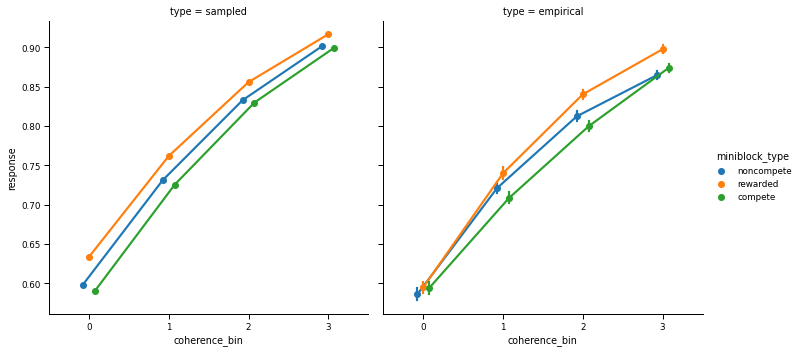

In [54]:
sampled = fig_df[['sub','coherence_bin','miniblock_type','rt_positive_sampled','response_sampled']]
sampled = sampled.rename(columns = {'rt_positive_sampled':'rt',
               'response_sampled':'response'})
sampled['type'] = 'sampled'

real = fig_df[['sub','coherence_bin','miniblock_type','rt_positive','response']]
real = real.rename(columns = {'rt_positive':'rt'})
real['type'] = 'empirical'

new_df = pd.concat([sampled,real])

sns.catplot(
        x="coherence_bin",
           y="response",
           hue = "miniblock_type",
    col = 'type',
            kind = 'point',
    hue_order = ['noncompete','rewarded','compete'],
            dodge = .15,
    ci = 68,
           data=new_df)

In [59]:
new_df.groupby('type').mean()

,coherence_bin,rt,response
type,,,
empirical,1.502795,1.265419,0.753111
sampled,1.502795,1.323087,0.773498


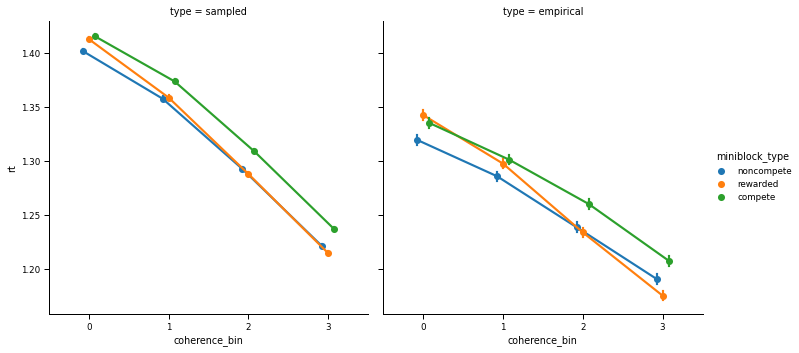

In [55]:
sns.catplot(
        x="coherence_bin",
           y="rt",
           hue = "miniblock_type",
    col = 'type',
            kind = 'point',
    hue_order = ['noncompete','rewarded','compete'],
            dodge = .15,
    ci = 68,
           data=new_df)

In [1]:
sample0 = res.reset_index()
sample0 = sample0[sample0['sample'] ==202]

NameError: name 'res' is not defined

In [ ]:
a = sample0.copy()
a['Reaction Time'] = a['rt']
a['label'] = 'empirical'
b = sample0.copy()
b['Reaction Time'] = b['rt_sampled']
b['label'] = 'simulated'
fig = pd.concat([a,b])[['Reaction Time','label','sub']].reset_index()


ax = sns.histplot(x = 'Reaction Time',
            color = 'red',
                  element = 'step',
#                   alpha = 0,
                  common_bins =True,
#                   kde = True,
                  binwidth = .05,
                  pmax = 1,
            fill = False,
            data = b)
sns.histplot(x = 'Reaction Time',
                               common_bins =True,
                               binwidth = .05,
             ax = ax,
            data = a)
plt.xlim([-2,2])
plt.savefig('/home/despo/rule_habit/simulated_data/simulated_fits_group.png',
             dpi = 300)

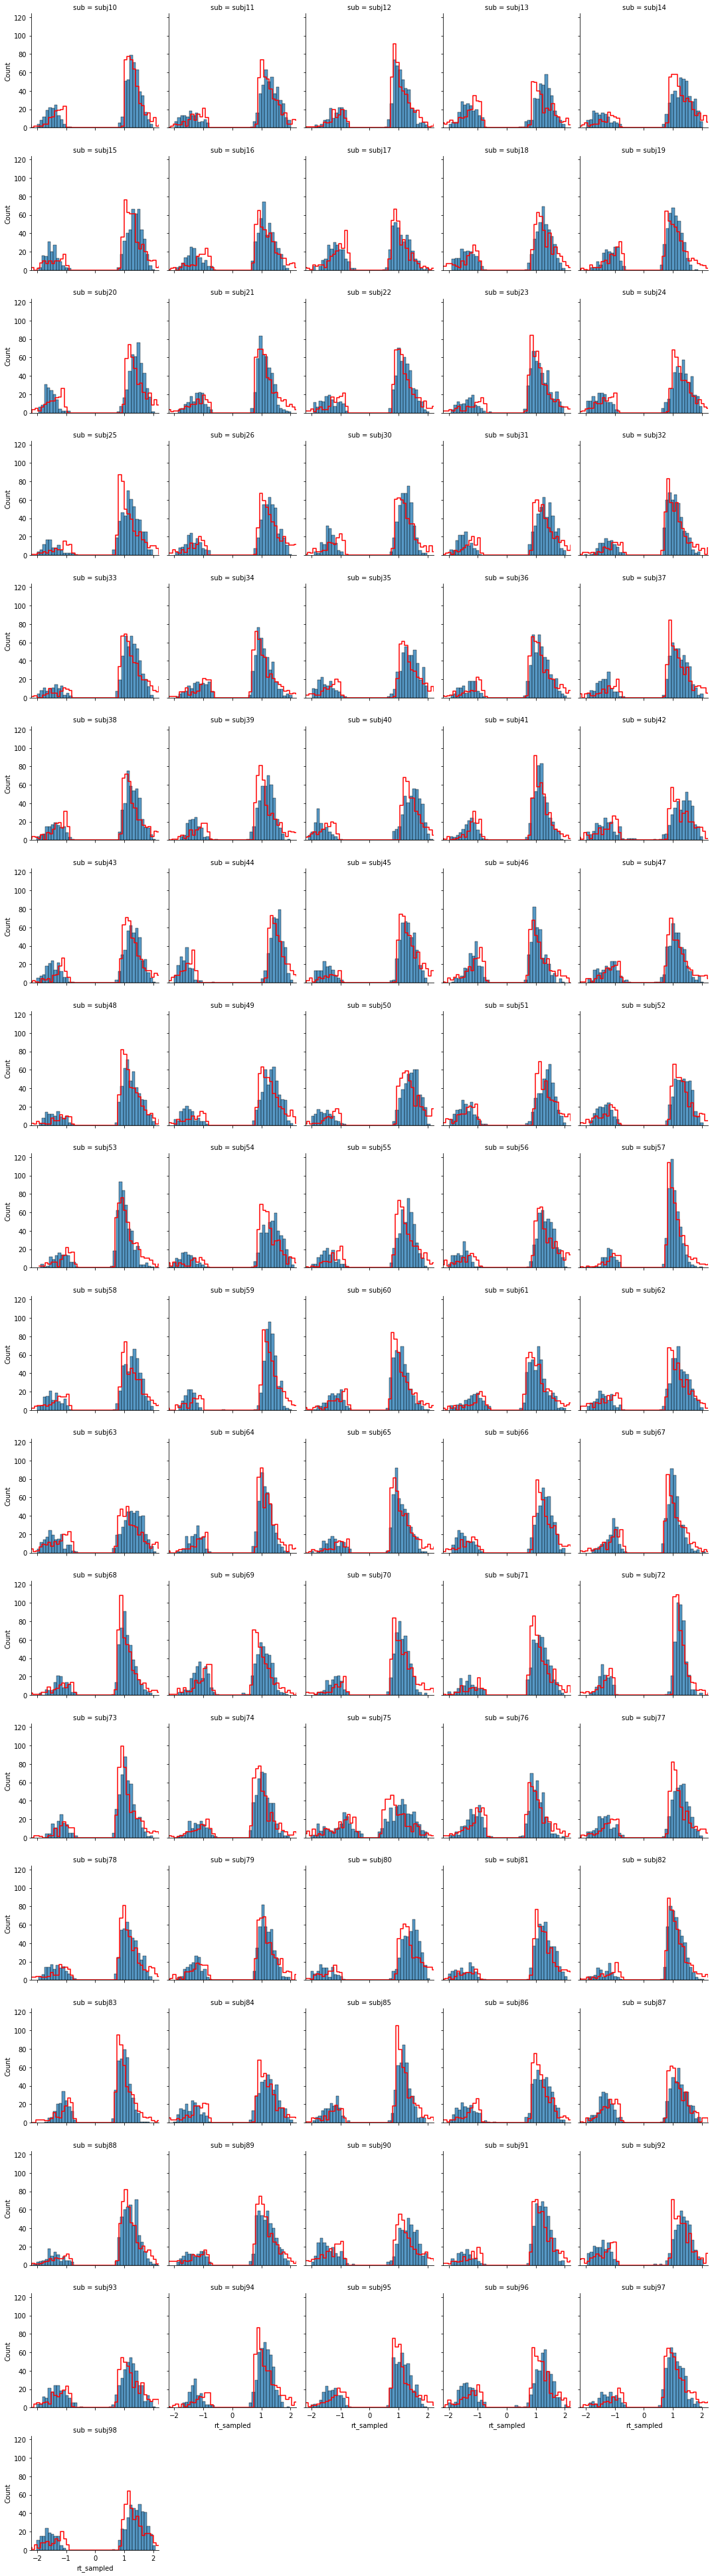

In [25]:
g = sns.FacetGrid(b,
                  col = 'sub',
                  sharex = True,
                  xlim = (-2.2,2.2),
                  col_wrap = 5)
g.map(sns.histplot, 
          'rt', 
           binwidth = .1,
          common_bins = True)
g.map(sns.histplot, 'rt_sampled', 
              color = 'red',
                  element = 'step',
                              binwidth = .1,
                        common_bins = True,
            fill = False)
plt.savefig('/home/despo/rule_habit/simulated_data/simulated_fits.png',
             dpi = 300)